In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import traer_variables_categoricas
from preprocessing import aplicar_one_hot_encoding
from preprocessing import traer_variables_discretas

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)
X, y = dividir_dataset(df)

# CategoricalNB

In [6]:
def definir_mejores_hiperparametros_categorical(X, y):    
    metrics = []
    y_array=np.array(y)    
    for alpha in [0.001,0.01,0.5,0.3,0.1,1,2,3,5,10]: 
        kf = StratifiedKFold(n_splits=5)
        metricas_de_la_combinacion = []
        for fold_index, (train_index, test_index) in enumerate(kf.split(X, y_array)):
            print(alpha)
            categoricalNB = CategoricalNB(alpha=alpha)
            categoricalNB.fit(X.iloc[train_index], y.iloc[train_index])
            y_pred = categoricalNB.predict(X.iloc[test_index])
            metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
            print(roc_auc_score(y.iloc[test_index], y_pred))

        print(f"Promedio de la combinación: {np.mean(metricas_de_la_combinacion)}")
        metrics.append((alpha,np.mean(metricas_de_la_combinacion)))
                    
    df_metrics = pd.DataFrame(metrics, columns = ['alpha','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]
    return mejor_combinacion

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   anios_estudiados                            32561 non-null  int64 
 1   barrio                                      32561 non-null  object
 2   categoria_de_trabajo                        30725 non-null  object
 3   edad                                        32561 non-null  int64 
 4   educacion_alcanzada                         32561 non-null  object
 5   estado_marital                              32561 non-null  object
 6   ganancia_perdida_declarada_bolsa_argentina  32561 non-null  int64 
 7   genero                                      32561 non-null  object
 8   horas_trabajo_registradas                   32561 non-null  int64 
 9   religion                                    32561 non-null  object
 10  rol_familiar_registrad

In [8]:
X_categoricas = traer_variables_categoricas(X)
X_categoricas = aplicar_one_hot_encoding(X_categoricas)
X_train, X_test, y_train, y_test = train_test_split(X_categoricas, y, test_size=0.25, random_state=0)

In [9]:
mejor_combinacion = definir_mejores_hiperparametros_categorical(X_categoricas, y)
print(mejor_combinacion)

0.001
0.7596466659860032
0.001
0.7612360478171851
0.001
0.7567872415956673
0.001
0.7659191103625915
0.001
0.7624568638134865
Promedio de la combinación: 0.7612091859149868
0.01
0.7596466659860032
0.01
0.7612360478171851
0.01
0.7567872415956673
0.01
0.7659191103625915
0.01
0.7624568638134865
Promedio de la combinación: 0.7612091859149868
0.5
0.7596466659860032
0.5
0.7612360478171851
0.5
0.7567872415956673
0.5
0.7661368552275278
0.5
0.7624568638134865
Promedio de la combinación: 0.761252734887974
0.3
0.7596466659860032
0.3
0.7612360478171851
0.3
0.7567872415956673
0.3
0.7661368552275278
0.3
0.7624568638134865
Promedio de la combinación: 0.761252734887974
0.1
0.7596466659860032
0.1
0.7612360478171851
0.1
0.7567872415956673
0.1
0.7662379879136121
0.1
0.7624568638134865
Promedio de la combinación: 0.7612729614251907
1
0.7596466659860032
1
0.7612360478171851
1
0.7567872415956673
1
0.7661368552275278
1
0.7624568638134865
Promedio de la combinación: 0.761252734887974
2
0.7596466659860032
2
0.7

In [10]:
parametros_categoricalNB = mejor_combinacion.loc[:].values[0]
categoricalNB = CategoricalNB(alpha=parametros_categoricalNB[0])
categoricalNB.fit(X_train, y_train)

CategoricalNB(alpha=0.1)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.90      0.80      0.84      6159
   Tiene Alto Valor Adquisitivo       0.53      0.71      0.61      1982

                       accuracy                           0.78      8141
                      macro avg       0.71      0.76      0.73      8141
                   weighted avg       0.81      0.78      0.79      8141



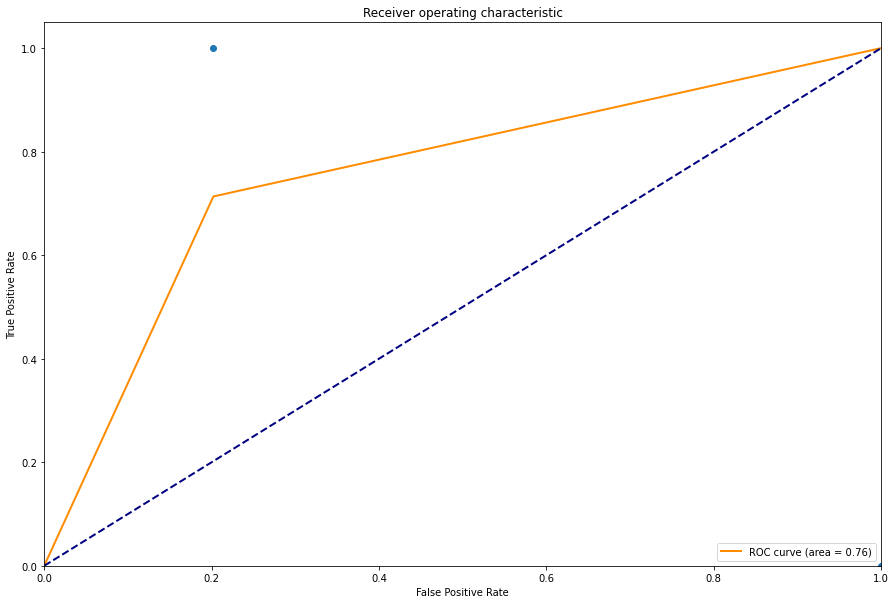

0.7556387910089982

In [11]:
y_pred = categoricalNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)

# MultinomialNB

In [12]:
def definir_mejores_hiperparametros_multinomial(X, y):    
    metrics = []
    y_array=np.array(y)    
    for alpha in [0.001,0.01,0.5,0.3,0.1,1,2,3,5,10]: 
        kf = StratifiedKFold(n_splits=5)
        metricas_de_la_combinacion = []
        for fold_index, (train_index, test_index) in enumerate(kf.split(X, y_array)):
            print(alpha)
            multinomialNB = MultinomialNB(alpha=alpha)
            multinomialNB.fit(X.iloc[train_index], y.iloc[train_index])
            y_pred = multinomialNB.predict(X.iloc[test_index])
            metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
            print(roc_auc_score(y.iloc[test_index], y_pred))

        print(f"Promedio de la combinación: {np.mean(metricas_de_la_combinacion)}")
        metrics.append((alpha,np.mean(metricas_de_la_combinacion)))
                    
    df_metrics = pd.DataFrame(metrics, columns = ['alpha','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]
    return mejor_combinacion

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   anios_estudiados                            32561 non-null  int64 
 1   barrio                                      32561 non-null  object
 2   categoria_de_trabajo                        30725 non-null  object
 3   edad                                        32561 non-null  int64 
 4   educacion_alcanzada                         32561 non-null  object
 5   estado_marital                              32561 non-null  object
 6   ganancia_perdida_declarada_bolsa_argentina  32561 non-null  int64 
 7   genero                                      32561 non-null  object
 8   horas_trabajo_registradas                   32561 non-null  int64 
 9   religion                                    32561 non-null  object
 10  rol_familiar_registrad

In [14]:
X_discretas = traer_variables_discretas(X)
X_discretas.info()
X_train, X_test, y_train, y_test = train_test_split(X_discretas, y, test_size=0.25, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   anios_estudiados           32561 non-null  int64
 1   edad                       32561 non-null  int64
 2   horas_trabajo_registradas  32561 non-null  int64
dtypes: int64(3)
memory usage: 763.3 KB


In [15]:
mejor_combinacion = definir_mejores_hiperparametros_multinomial(X_discretas, y)
print(mejor_combinacion)

0.001
0.4993932038834951
0.001
0.4997977346278317
0.001
0.4996966019417476
0.001
0.49898867313915857
0.001
0.4996966019417476
Promedio de la combinación: 0.49951456310679615
0.01
0.4993932038834951
0.01
0.4997977346278317
0.01
0.4996966019417476
0.01
0.49898867313915857
0.01
0.4996966019417476
Promedio de la combinación: 0.49951456310679615
0.5
0.4993932038834951
0.5
0.4997977346278317
0.5
0.4996966019417476
0.5
0.49898867313915857
0.5
0.4996966019417476
Promedio de la combinación: 0.49951456310679615
0.3
0.4993932038834951
0.3
0.4997977346278317
0.3
0.4996966019417476
0.3
0.49898867313915857
0.3
0.4996966019417476
Promedio de la combinación: 0.49951456310679615
0.1
0.4993932038834951
0.1
0.4997977346278317
0.1
0.4996966019417476
0.1
0.49898867313915857
0.1
0.4996966019417476
Promedio de la combinación: 0.49951456310679615
1
0.4993932038834951
1
0.4997977346278317
1
0.4996966019417476
1
0.49898867313915857
1
0.4996966019417476
Promedio de la combinación: 0.49951456310679615
2
0.4993932

In [16]:
parametros_multinomialNB = mejor_combinacion.loc[:].values[0]
multinomialNB = MultinomialNB(alpha=parametros_categoricalNB[0])
multinomialNB.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.76      1.00      0.86      6159
   Tiene Alto Valor Adquisitivo       0.00      0.00      0.00      1982

                       accuracy                           0.76      8141
                      macro avg       0.38      0.50      0.43      8141
                   weighted avg       0.57      0.76      0.65      8141



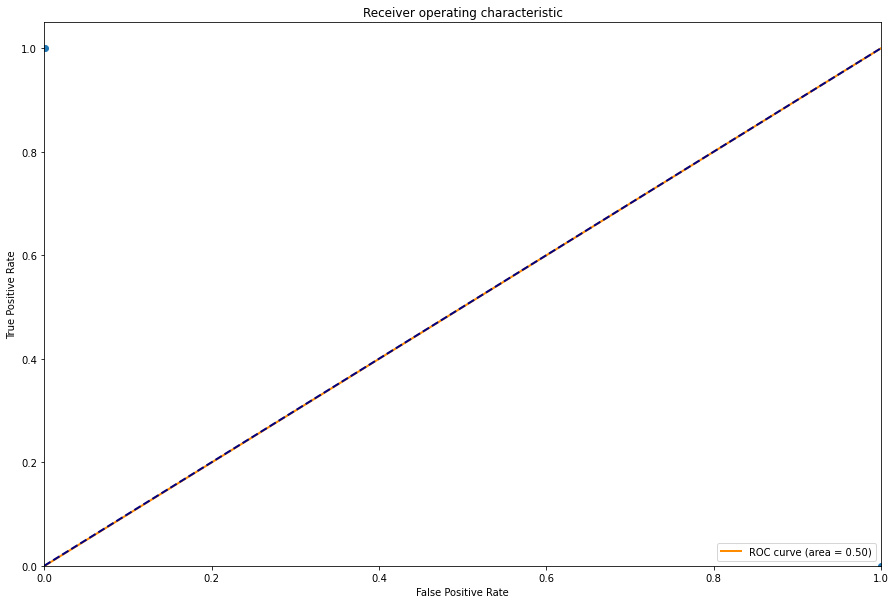

0.4996752719597337

In [17]:
y_pred = multinomialNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)

# GaussianNB

In [21]:
X_continuas = traer_variables_discretas(X)
X_train, X_test, y_train, y_test = train_test_split(X_continuas, y, test_size=0.25, random_state=0)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.82      0.93      0.87      6159
   Tiene Alto Valor Adquisitivo       0.65      0.37      0.47      1982

                       accuracy                           0.80      8141
                      macro avg       0.73      0.65      0.67      8141
                   weighted avg       0.78      0.80      0.78      8141



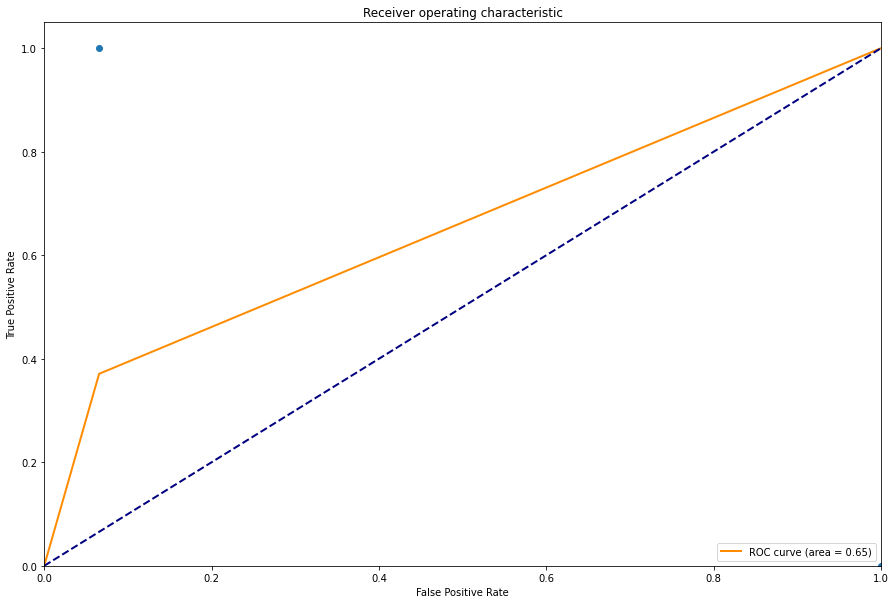

0.6526212368533886

In [22]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)
y_pred = gaussianNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)